In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/ridotto2022.csv

In [7]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ridotto2022.csv',
                index_col='data',
                parse_dates=True)
df = df.reset_index().rename(columns={'data':'ds'})
df

,ds,y
0,2022-01-01 00:00:00,0.000000
1,2022-01-01 01:00:00,0.000000
2,2022-01-01 02:00:00,0.000000
3,2022-01-01 03:00:00,0.000000
4,2022-01-01 04:00:00,0.000000
...,...,...
8155,2022-12-06 19:00:00,0.010556
8156,2022-12-06 20:00:00,0.000000
8157,2022-12-06 21:00:00,0.000000
8158,2022-12-06 22:00:00,0.000000


## Senza Filter

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

%matplotlib inline

In [9]:
### intiialize the Model
m=Prophet(interval_width = 0.95,
        daily_seasonality  = True,
        weekly_seasonality = True,
        yearly_seasonality = True,
        seasonality_mode   ='multiplicative',
        changepoint_range=0.8,
         )
model = m.fit(df)

20:43:08 - cmdstanpy - INFO - Chain [1] start processing
20:43:14 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = model.make_future_dataframe(periods=2400, freq='H')
future

,ds
0,2022-01-01 00:00:00
1,2022-01-01 01:00:00
2,2022-01-01 02:00:00
3,2022-01-01 03:00:00
4,2022-01-01 04:00:00
...,...
10555,2023-03-16 19:00:00
10556,2023-03-16 20:00:00
10557,2023-03-16 21:00:00
10558,2023-03-16 22:00:00


In [11]:
### Prediction
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2022-01-01 00:00:00,2.984545,-9.765393,8.880825,2.984545,2.984545,-1.079639,-1.079639,-1.079639,-1.140685,...,-0.159031,-0.159031,-0.159031,0.097985,0.097985,0.097985,0.0,0.0,0.0,-0.419882
1,2022-01-01 01:00:00,2.990099,-9.949016,7.373784,2.990099,2.990099,-1.244977,-1.244977,-1.244977,-1.338220,...,-0.187853,-0.187853,-0.187853,0.094610,0.094610,0.094610,0.0,0.0,0.0,-1.011311
2,2022-01-01 02:00:00,2.995654,-9.680121,9.014533,2.995654,2.995654,-1.051705,-1.051705,-1.051705,-1.177505,...,-0.217054,-0.217054,-0.217054,0.091254,0.091254,0.091254,0.0,0.0,0.0,-0.531744
3,2022-01-01 03:00:00,3.001208,-9.528947,9.239126,3.001208,3.001208,-0.735678,-0.735678,-0.735678,-0.894309,...,-0.246547,-0.246547,-0.246547,0.087917,0.087917,0.087917,0.0,0.0,0.0,0.317200
4,2022-01-01 04:00:00,3.006762,-9.018333,8.988604,3.006762,3.006762,-0.720454,-0.720454,-0.720454,-0.912096,...,-0.276240,-0.276240,-0.276240,0.084598,0.084598,0.084598,0.0,0.0,0.0,0.264307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10555,2023-03-16 19:00:00,-2.081472,-8.768266,9.009644,-26.345732,23.552428,-1.098140,-1.098140,-1.098140,-1.016266,...,0.334425,0.334425,0.334425,-0.252551,-0.252551,-0.252551,0.0,0.0,0.0,0.033858
10556,2023-03-16 20:00:00,-2.082920,-10.229354,11.816483,-26.357527,23.564820,-1.321089,-1.321089,-1.321089,-1.243529,...,0.330219,0.330219,0.330219,-0.252659,-0.252659,-0.252659,0.0,0.0,0.0,0.507252
10557,2023-03-16 21:00:00,-2.084368,-9.340970,9.001650,-26.369322,23.577204,-1.030127,-1.030127,-1.030127,-0.957810,...,0.325072,0.325072,0.325072,-0.252755,-0.252755,-0.252755,0.0,0.0,0.0,-0.087939
10558,2023-03-16 22:00:00,-2.085816,-13.338309,11.601084,-26.381117,23.589589,-0.721268,-0.721268,-0.721268,-0.655123,...,0.318986,0.318986,0.318986,-0.252841,-0.252841,-0.252841,0.0,0.0,0.0,-0.719350


In [12]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10555,2023-03-16 19:00:00,0.033858,-8.768266,9.009644
10556,2023-03-16 20:00:00,0.507252,-10.229354,11.816483
10557,2023-03-16 21:00:00,-0.087939,-9.340970,9.001650
10558,2023-03-16 22:00:00,-0.719350,-13.338309,11.601084
10559,2023-03-16 23:00:00,-0.601399,-12.406548,11.696395


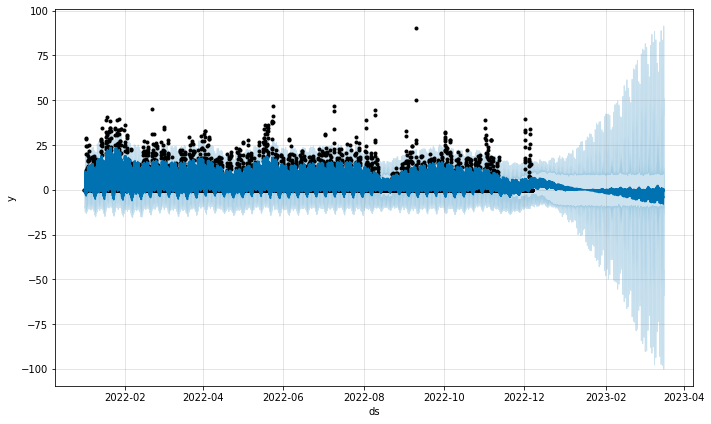

In [13]:
#### plot the predicted projection
model.plot(forecast);

In [14]:
######################### Dynamic PLOT ###############################
from prophet.plot import plot_plotly
from datetime import datetime

fig = plot_plotly(model, forecast)
fig.update_layout( 
                  yaxis_title="People",
                  xaxis_title="Data",
                  title="People",
                  )
#################### vertical line ############
#fig.add_vline(x=datetime.today(), line_width=3, line_dash="dash", line_color="red")
##############################################
#st.plotly_chart(fig)

fig

## Con Filter

In [15]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ridotto2022.csv',
                index_col='data',
                parse_dates=True)
df = df.reset_index().rename(columns={'data':'ds'})
df

,ds,y
0,2022-01-01 00:00:00,0.000000
1,2022-01-01 01:00:00,0.000000
2,2022-01-01 02:00:00,0.000000
3,2022-01-01 03:00:00,0.000000
4,2022-01-01 04:00:00,0.000000
...,...,...
8155,2022-12-06 19:00:00,0.010556
8156,2022-12-06 20:00:00,0.000000
8157,2022-12-06 21:00:00,0.000000
8158,2022-12-06 22:00:00,0.000000


In [16]:
#df = df[['total_people']].resample(rule='BH').sum()

df = df[df['ds'].dt.hour >=8]
df = df[df['ds'].dt.hour <=18]
df

,ds,y
8,2022-01-01 08:00:00,0.000000
9,2022-01-01 09:00:00,0.000000
10,2022-01-01 10:00:00,0.000000
11,2022-01-01 11:00:00,0.000000
12,2022-01-01 12:00:00,0.014444
...,...,...
8150,2022-12-06 14:00:00,0.000000
8151,2022-12-06 15:00:00,0.000000
8152,2022-12-06 16:00:00,0.010556
8153,2022-12-06 17:00:00,0.000000


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

%matplotlib inline

In [18]:
### intiialize the Model
m=Prophet(interval_width = 0.95,
        daily_seasonality  = True,
        weekly_seasonality = True,
        yearly_seasonality = True,
        seasonality_mode   ='multiplicative',
        changepoint_range=0.8,
         )
model = m.fit(df)

20:43:26 - cmdstanpy - INFO - Chain [1] start processing
20:43:28 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = model.make_future_dataframe(periods=2400, freq='H')
future

,ds
0,2022-01-01 08:00:00
1,2022-01-01 09:00:00
2,2022-01-01 10:00:00
3,2022-01-01 11:00:00
4,2022-01-01 12:00:00
...,...
6135,2023-03-16 14:00:00
6136,2023-03-16 15:00:00
6137,2023-03-16 16:00:00
6138,2023-03-16 17:00:00


In [20]:
## Filtro nelle ore dalle 8:00 alle 18:00

future = future[future['ds'].dt.hour >=8]
future = future[future['ds'].dt.hour <=18]
future

,ds
0,2022-01-01 08:00:00
1,2022-01-01 09:00:00
2,2022-01-01 10:00:00
3,2022-01-01 11:00:00
4,2022-01-01 12:00:00
...,...
6135,2023-03-16 14:00:00
6136,2023-03-16 15:00:00
6137,2023-03-16 16:00:00
6138,2023-03-16 17:00:00


In [21]:
### Prediction
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2022-01-01 08:00:00,8.405180,-13.285579,12.101988,8.405180,8.405180,-0.501868,-0.501868,-0.501868,-1.113205,...,-0.487397,-0.487397,-0.487397,-0.123941,-0.123941,-0.123941,0.0,0.0,0.0,-0.951510
1,2022-01-01 09:00:00,8.405725,-3.993780,20.929989,8.405725,8.405725,0.630879,0.630879,0.630879,-0.017063,...,-0.520013,-0.520013,-0.520013,-0.127929,-0.127929,-0.127929,0.0,0.0,0.0,8.262297
2,2022-01-01 10:00:00,8.406270,1.502724,27.156531,8.406270,8.406270,1.346170,1.346170,1.346170,0.662467,...,-0.551814,-0.551814,-0.551814,-0.131889,-0.131889,-0.131889,0.0,0.0,0.0,13.975146
3,2022-01-01 11:00:00,8.406815,0.918377,25.224307,8.406815,8.406815,1.194171,1.194171,1.194171,0.475688,...,-0.582661,-0.582661,-0.582661,-0.135821,-0.135821,-0.135821,0.0,0.0,0.0,12.405836
4,2022-01-01 12:00:00,8.407359,-7.481663,18.983777,8.407359,8.407359,0.486301,0.486301,0.486301,-0.265839,...,-0.612416,-0.612416,-0.612416,-0.139724,-0.139724,-0.139724,0.0,0.0,0.0,6.172354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835,2023-03-16 14:00:00,1.167572,-12.016032,13.962300,-0.357926,2.970413,-0.044964,-0.044964,-0.044964,0.033406,...,0.423190,0.423190,0.423190,-0.344820,-0.344820,-0.344820,0.0,0.0,0.0,1.206577
4836,2023-03-16 15:00:00,1.166558,-11.604444,15.160307,-0.360910,2.970969,0.292311,0.292311,0.292311,0.372705,...,0.425116,0.425116,0.425116,-0.344722,-0.344722,-0.344722,0.0,0.0,0.0,1.601339
4837,2023-03-16 16:00:00,1.165543,-11.071748,14.619706,-0.363893,2.971524,0.363877,0.363877,0.363877,0.445028,...,0.425762,0.425762,0.425762,-0.344611,-0.344611,-0.344611,0.0,0.0,0.0,1.684242
4838,2023-03-16 17:00:00,1.164529,-12.644125,14.249915,-0.366877,2.972080,-0.101170,-0.101170,-0.101170,-0.020556,...,0.425098,0.425098,0.425098,-0.344485,-0.344485,-0.344485,0.0,0.0,0.0,1.140591


In [22]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4835,2023-03-16 14:00:00,1.206577,-12.016032,13.962300
4836,2023-03-16 15:00:00,1.601339,-11.604444,15.160307
4837,2023-03-16 16:00:00,1.684242,-11.071748,14.619706
4838,2023-03-16 17:00:00,1.140591,-12.644125,14.249915
4839,2023-03-16 18:00:00,0.374978,-12.193263,13.017944


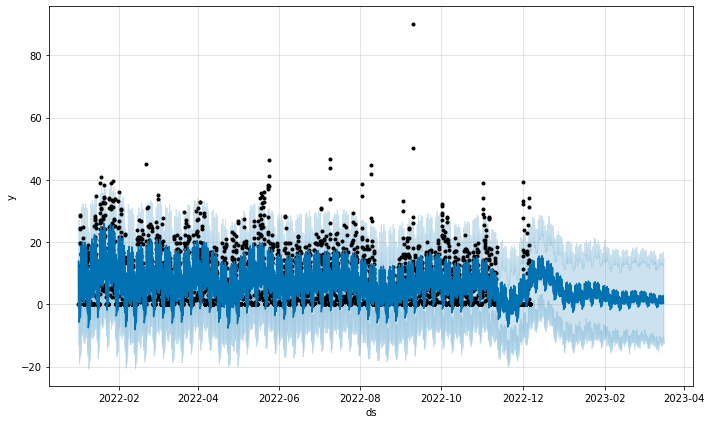

In [23]:
#### plot the predicted projection
model.plot(forecast);

In [24]:
######################### Dynamic PLOT ###############################
from prophet.plot import plot_plotly
from datetime import datetime

fig = plot_plotly(model, forecast)
fig.update_layout( 
                  yaxis_title="People",
                  xaxis_title="Data",
                  title="People",
                  )
#################### vertical line ############
#fig.add_vline(x=datetime.today(), line_width=3, line_dash="dash", line_color="red")
##############################################
#st.plotly_chart(fig)

fig

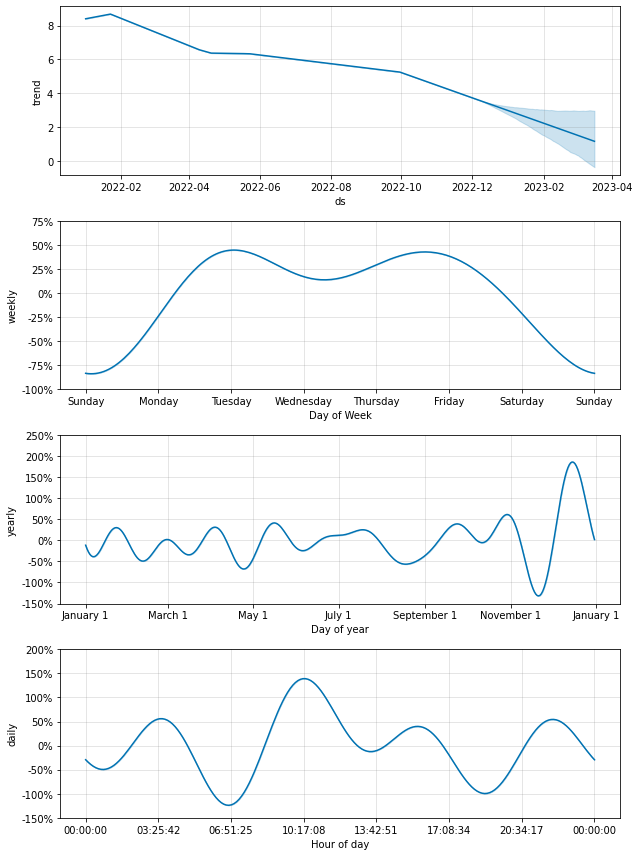

In [25]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(forecast);

In [26]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error

df_merge = pd.merge(df, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.tail()

c:\Users\danie\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



,ds,yhat_lower,yhat_upper,yhat,y
3735,2022-12-06 14:00:00,-4.325513,20.973004,7.812250,0.000000
3736,2022-12-06 15:00:00,-4.367881,21.219662,8.995206,0.000000
3737,2022-12-06 16:00:00,-3.596515,21.904947,9.221101,0.010556
3738,2022-12-06 17:00:00,-4.282219,20.526614,7.516310,0.000000
3739,2022-12-06 18:00:00,-7.882206,16.961795,5.129284,0.000000


In [27]:
# calculate MAE between observed and predicted values 
y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values

mae_01 = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae_01)

mse_01 = mean_squared_error(y_true, y_pred)
print('MSE: %.3f' % mse_01)

mape_01 = mean_absolute_percentage_error(y_true, y_pred)
print(f'MAPE: %.3f' % mape_01)

MAE: 4.732
MSE: 44.006
MAPE: 4820933868026774.000


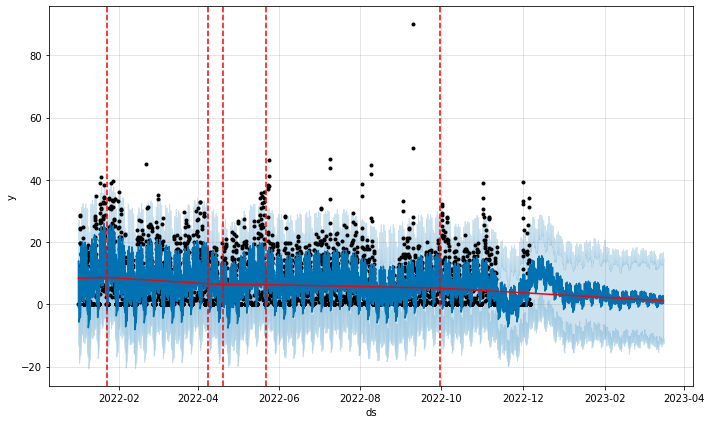

In [28]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast);
add_changepoints_to_plot(fig.gca(), model, forecast);